In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Reading datasets
dfs = []
for i in range(1,5):
    path = './Data/UNSW-NB15_{}.csv'  # There are 4 input csv files
    dfs.append(pd.read_csv(path.format(i), header = None,low_memory=False))
all_data = pd.concat(dfs).reset_index(drop=True)  # Concat all to a single df

In [3]:
# Assigning column names# This csv file contains names of all the features
df_col = pd.read_csv('./Data/NUSW-NB15_features.csv', encoding='ISO-8859-1')
# Making column names lower case, removing spaces
df_col['Name'] = df_col['Name'].apply(lambda x: x.strip().replace(' ', '').lower())
# Renaming our dataframe with proper column names
all_data.columns = df_col['Name']

In [4]:
all_data.head()

Name,srcip,sport,dstip,dsport,proto,state,dur,sbytes,dbytes,sttl,...,ct_ftp_cmd,ct_srv_src,ct_srv_dst,ct_dst_ltm,ct_src_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,attack_cat,label
0,59.166.0.0,1390,149.171.126.6,53,udp,CON,0.001055,132,164,31,...,0,3,7,1,3,1,1,1,NaN,0
1,59.166.0.0,33661,149.171.126.9,1024,udp,CON,0.036133,528,304,31,...,0,2,4,2,3,1,1,2,NaN,0
2,59.166.0.6,1464,149.171.126.7,53,udp,CON,0.001119,146,178,31,...,0,12,8,1,2,2,1,1,NaN,0
3,59.166.0.5,3593,149.171.126.5,53,udp,CON,0.001209,132,164,31,...,0,6,9,1,1,1,1,1,NaN,0
4,59.166.0.3,49664,149.171.126.0,53,udp,CON,0.001169,146,178,31,...,0,7,9,1,1,1,1,1,NaN,0


In [5]:
print(all_data.shape)

(2540047, 49)


In [6]:
# We don’t have “normal” values for “attack_cat”, so we must fill Null values with “normal”
all_data['attack_cat'] = all_data['attack_cat'].fillna('normal')

In [8]:
# Checking for null values
print(all_data.isnull().sum())

Name
srcip                     0
sport                     0
dstip                     0
dsport                    0
proto                     0
state                     0
dur                       0
sbytes                    0
dbytes                    0
sttl                      0
dttl                      0
sloss                     0
dloss                     0
service                   0
sload                     0
dload                     0
spkts                     0
dpkts                     0
swin                      0
dwin                      0
stcpb                     0
dtcpb                     0
smeansz                   0
dmeansz                   0
trans_depth               0
res_bdy_len               0
sjit                      0
djit                      0
stime                     0
ltime                     0
sintpkt                   0
dintpkt                   0
tcprtt                    0
synack                    0
ackdat                    0
is_sm_ips_ports

In [22]:
all_data['ct_flw_http_mthd'] = all_data.ct_flw_http_mthd.fillna(value=0)

In [23]:
# Print all columns info
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2540047 entries, 0 to 2540046
Data columns (total 49 columns):
 #   Column            Dtype  
---  ------            -----  
 0   srcip             object 
 1   sport             object 
 2   dstip             object 
 3   dsport            object 
 4   proto             object 
 5   state             object 
 6   dur               float64
 7   sbytes            int64  
 8   dbytes            int64  
 9   sttl              int64  
 10  dttl              int64  
 11  sloss             int64  
 12  dloss             int64  
 13  service           object 
 14  sload             float64
 15  dload             float64
 16  spkts             int64  
 17  dpkts             int64  
 18  swin              int64  
 19  dwin              int64  
 20  stcpb             int64  
 21  dtcpb             int64  
 22  smeansz           int64  
 23  dmeansz           int64  
 24  trans_depth       int64  
 25  res_bdy_len       int64  
 26  sjit          

In [15]:
# Even though it's a binary column, but there're values like 2 and 4
print(all_data['is_ftp_login'].value_counts())
all_data['is_ftp_login'] = (all_data.is_ftp_login.fillna(value=0)).astype(int)
# remove all except 0 and 1
all_data['is_ftp_login'] = np.where(all_data['is_ftp_login']>1, 1, all_data['is_ftp_login'])

0    2496472
1      43389
4        156
2         30
Name: is_ftp_login, dtype: int64


In [17]:
print(all_data['is_ftp_login'].value_counts())
print(all_data.shape)

0    2496472
1      43575
Name: is_ftp_login, dtype: int64
(2540047, 49)


In [24]:
# There are no Null values in the train data anymore
print(all_data.isnull().sum())

Name
srcip               0
sport               0
dstip               0
dsport              0
proto               0
state               0
dur                 0
sbytes              0
dbytes              0
sttl                0
dttl                0
sloss               0
dloss               0
service             0
sload               0
dload               0
spkts               0
dpkts               0
swin                0
dwin                0
stcpb               0
dtcpb               0
smeansz             0
dmeansz             0
trans_depth         0
res_bdy_len         0
sjit                0
djit                0
stime               0
ltime               0
sintpkt             0
dintpkt             0
tcprtt              0
synack              0
ackdat              0
is_sm_ips_ports     0
ct_state_ttl        0
ct_flw_http_mthd    0
is_ftp_login        0
ct_ftp_cmd          0
ct_srv_src          0
ct_srv_dst          0
ct_dst_ltm          0
ct_src_ltm          0
ct_src_dport_ltm    0
ct_ds

# Observation
## Categorical columns: 
‘proto’, ‘service’, ‘state’
From the research paper we found that there are binary columns also
Numerical but binary: ‘is_sm_ips_ports’, ‘is_ftp_login’

## Numerical columns: 
‘id’, ‘dur’, ‘spkts’, ‘dpkts’, ‘sbytes’, ‘dbytes’, ‘rate’, ‘sttl’, ‘dttl’, ‘sload’, ‘dload’, ‘sloss’, ‘dloss’, ‘sinpkt’, ‘dinpkt’, ‘sjit’, ‘djit’, ‘swin’, ‘stcpb’, ‘dtcpb’, ‘dwin’, ‘tcprtt’, ‘synack’, ‘ackdat’, ‘smean’, ‘dmean’, ‘trans_depth’, ‘response_body_len’, ‘ct_srv_src’, ‘ct_state_ttl’, ‘ct_dst_ltm’, ‘ct_src_dport_ltm’, ‘ct_dst_sport_ltm’, ‘ct_dst_src_ltm’, ‘ct_ftp_cmd’, ‘ct_flw_http_mthd’, ‘ct_src_ltm’, ‘ct_srv_dst’
## Target columns:
 ‘attack_cat’, ‘label’

In [25]:
# “service” is a categorical column and has a value “-“ that is not correct so replace those with None. And in attack category we have same category twice the difference is singular and plural.
all_data['service'] = all_data['service'].replace('-', None)
all_data['attack_cat'] = all_data['attack_cat'].replace('Backdoors', 'Backdoor')

# Exploratory Data Analysis


<AxesSubplot: xlabel='Name', ylabel='Name'>

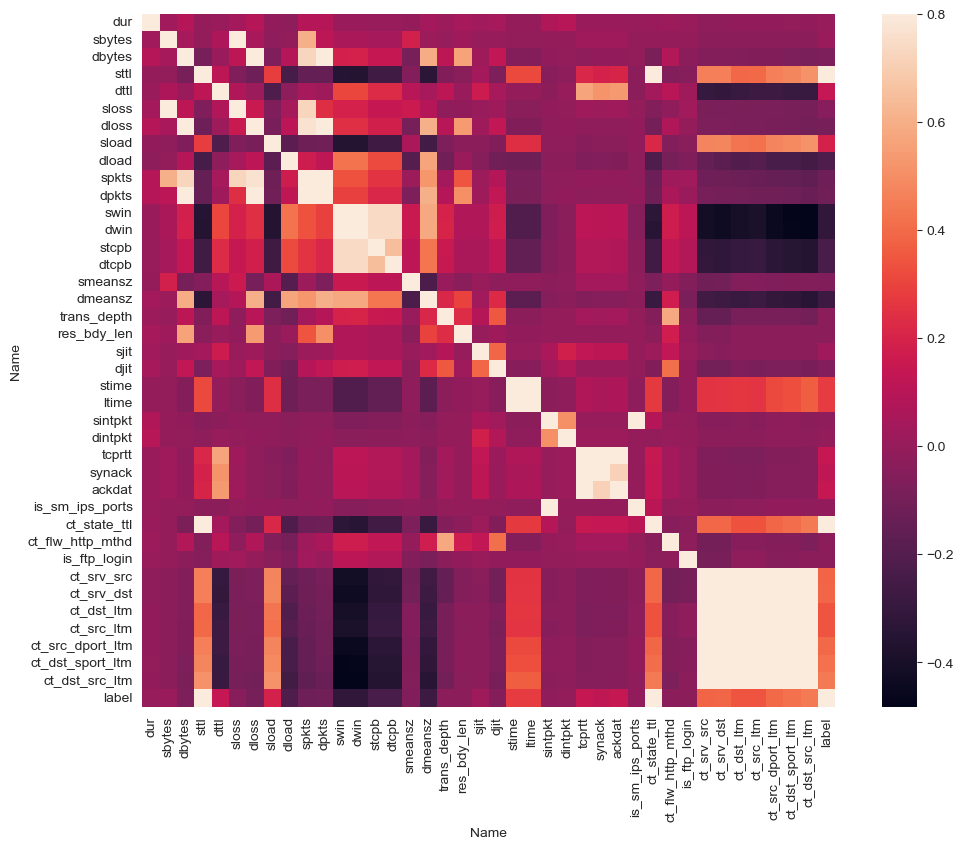

In [26]:
# Correlation matrix
corrmat = all_data.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True)

In [27]:
# Remove duplicate rows
all_data.drop_duplicates(inplace=True)

In [28]:
print(all_data.shape)

(2059415, 49)


In [29]:
def col_countplot(col,data):
    """
    This function plots countplot of a given feature for dataset
    """
    fig, ax = plt.subplots(figsize=(8,4))
    sns.set_style('whitegrid')
    # countplot of the given column
    ax = sns.countplot(x=col, hue='label', data=data)
    ax.legend(loc="upper right", labels=('normal', 'attack'))
    ax.set_title("Data")
    plt.xticks(rotation=45)
    plt.show()

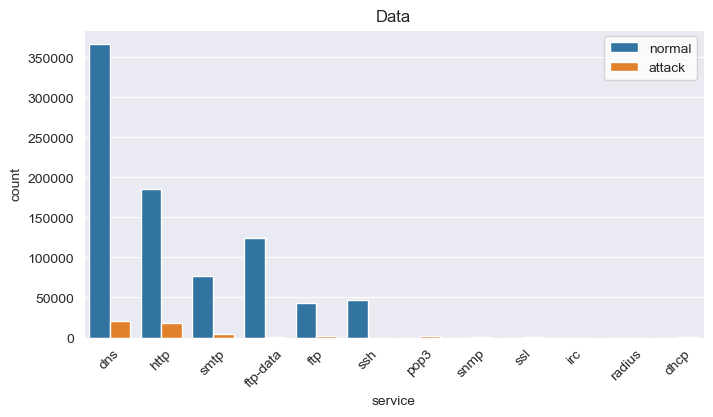

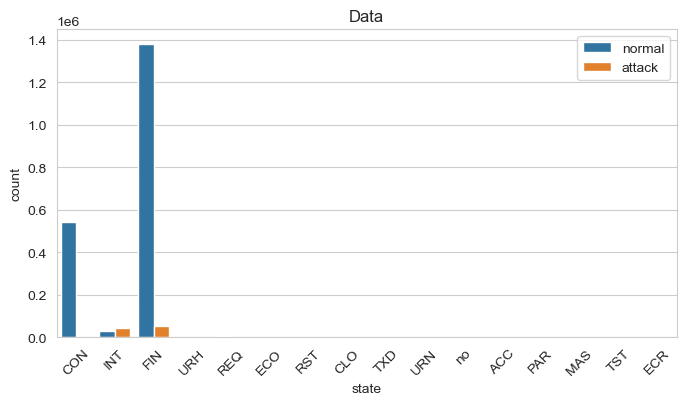

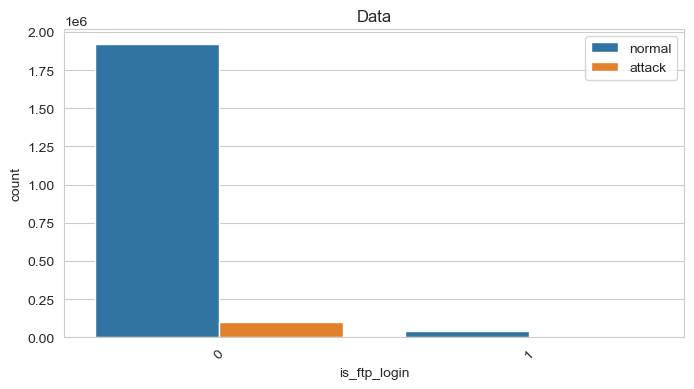

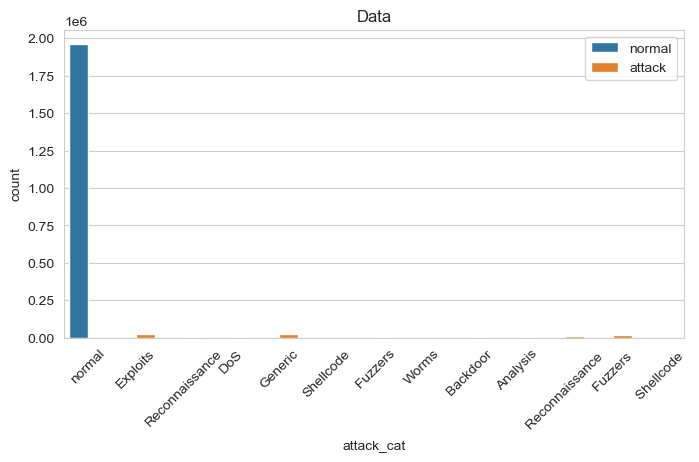

In [30]:
# Plotting countplot for categorical columns
for col in ['service', 'state', 'is_ftp_login','attack_cat']:
    col_countplot(col,all_data)

In [31]:
# Save the data in "cleaned_data.csv"
all_data.to_csv('./Data/cleaned_data.csv', index=False)

In [32]:
# Read the data from "cleaned_data.csv"
all_data = pd.read_csv('./Data/cleaned_data.csv', low_memory=False)
all_data.head()
print(all_data.shape)

(2059415, 49)


In [29]:
# print info of all columns
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2059415 entries, 0 to 2059414
Data columns (total 49 columns):
 #   Column            Dtype  
---  ------            -----  
 0   srcip             object 
 1   sport             object 
 2   dstip             object 
 3   dsport            object 
 4   proto             object 
 5   state             object 
 6   dur               float64
 7   sbytes            int64  
 8   dbytes            int64  
 9   sttl              int64  
 10  dttl              int64  
 11  sloss             int64  
 12  dloss             int64  
 13  service           object 
 14  sload             float64
 15  dload             float64
 16  spkts             int64  
 17  dpkts             int64  
 18  swin              int64  
 19  dwin              int64  
 20  stcpb             int64  
 21  dtcpb             int64  
 22  smeansz           int64  
 23  dmeansz           int64  
 24  trans_depth       int64  
 25  res_bdy_len       int64  
 26  sjit          

In [4]:
# Read the training and testing data
train = pd.read_csv('./Data/UNSW_NB15_training-set.csv', low_memory=False)
test = pd.read_csv('./Data/UNSW_NB15_testing-set.csv', low_memory=False)

In [7]:
merged_data = pd.concat([train, test])
print(merged_data['attack_cat'].value_counts())
print(merged_data['label'].value_counts())

Normal            93000
Generic           58871
Exploits          44525
Fuzzers           24246
DoS               16353
Reconnaissance    13987
Analysis           2677
Backdoor           2329
Shellcode          1511
Worms               174
Name: attack_cat, dtype: int64
1    164673
0     93000
Name: label, dtype: int64


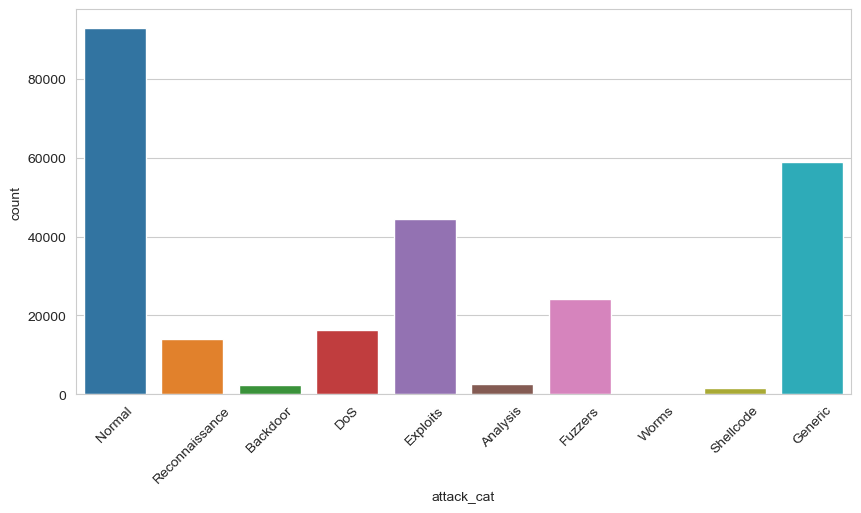

In [8]:
# Plot the distribution of attack categories
plt.figure(figsize=(10,5))
sns.countplot(x='attack_cat', data=merged_data)
plt.xticks(rotation=45)
plt.show()


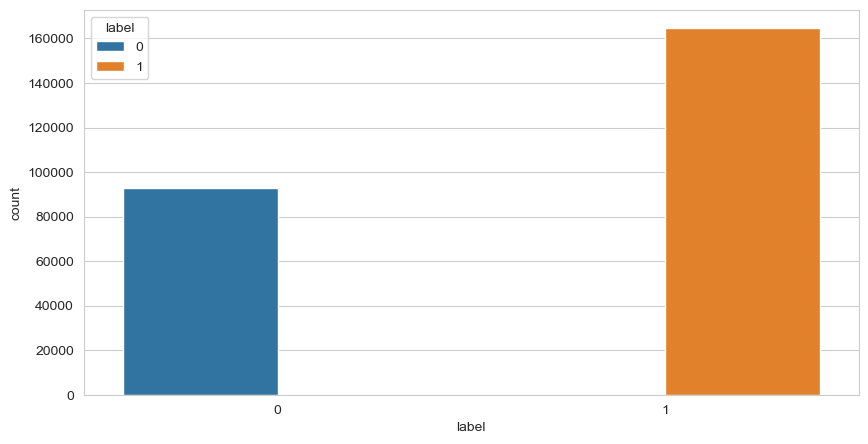

In [13]:
# Plot the distribution of attack categories
plt.figure(figsize=(10,5))
sns.countplot(x='label', hue='label', data=merged_data)
plt.xticks(rotation=0)
plt.show()


In [11]:
# Print out 1 sample for each attack category
samples = {
    
}
for attack in merged_data['attack_cat'].unique():
    samples[attack] = merged_data[merged_data['attack_cat'] == attack].iloc[0]
    print(samples[attack])
    

id                             1
dur                     0.000011
proto                        udp
service                        -
state                        INT
spkts                          2
dpkts                          0
sbytes                       496
dbytes                         0
rate                  90909.0902
sttl                         254
dttl                           0
sload                180363632.0
dload                        0.0
sloss                          0
dloss                          0
sinpkt                     0.011
dinpkt                       0.0
sjit                         0.0
djit                         0.0
swin                           0
stcpb                          0
dtcpb                          0
dwin                           0
tcprtt                       0.0
synack                       0.0
ackdat                       0.0
smean                        248
dmean                          0
trans_depth                    0
response_b

In [14]:
# print list of all columns
merged_data.columns

Index(['id', 'dur', 'proto', 'service', 'state', 'spkts', 'dpkts', 'sbytes',
       'dbytes', 'rate', 'sttl', 'dttl', 'sload', 'dload', 'sloss', 'dloss',
       'sinpkt', 'dinpkt', 'sjit', 'djit', 'swin', 'stcpb', 'dtcpb', 'dwin',
       'tcprtt', 'synack', 'ackdat', 'smean', 'dmean', 'trans_depth',
       'response_body_len', 'ct_srv_src', 'ct_state_ttl', 'ct_dst_ltm',
       'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'ct_dst_src_ltm',
       'is_ftp_login', 'ct_ftp_cmd', 'ct_flw_http_mthd', 'ct_src_ltm',
       'ct_srv_dst', 'is_sm_ips_ports', 'attack_cat', 'label'],
      dtype='object')

In [15]:
print(len(merged_data.columns))

45
